In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.lines as mlines
from scipy.interpolate import interp1d
from scipy.interpolate import griddata

/Users/jpfaendt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:

# phi1 phi2

#This is the phi/psi data from the 2CV PBMetaD simulation, no correction 
# phi psi theta zeta vbias phi-ctL phi-ctM psi-ctL psi-ctM
##   0  1   2     3   4    5          6        7       8        
data=np.genfromtxt('ALA2/PBMetad-2D/rewfileall',comments='#')
#make 2D histogram then replace all zeros with 1e-15


In [3]:
bins=50
temp=300
beta=1/8.314e-3/temp

# phi psi theta zeta vbias phi-ctL phi-ctM psi-ctL psi-ctM
ang1wt1, xedges, yedges = np.histogram2d(data[:,0],data[:,1], bins=bins,normed=True,weights=np.exp(beta*(data[:,4]-data[:,7])))

#ang1wt1=np.transpose(ang1wt1) #verify the X/Y coord on your own
# this makes a very small prob = very high free-energy (40kT)
ang1wt1[ang1wt1 == 0 ] = 1e-17


ang1wt2, xedges2, yedges2 = np.histogram2d(data[:,0],data[:,1], bins=bins,normed=True,weights=np.exp(beta*(data[:,4]-data[:,8])))

#ang1wt1=np.transpose(ang1wt1) #verify the X/Y coord on your own
# this makes a very small prob = very high free-energy (40kT)
ang1wt2[ang1wt2 == 0 ] = 1e-17


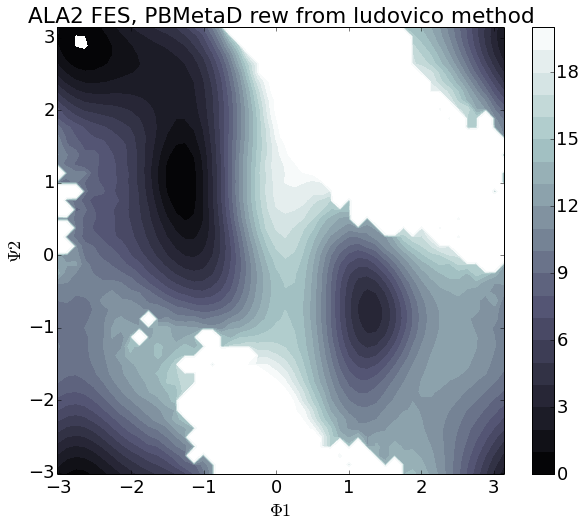

In [4]:
%matplotlib inline
ang1wt1=np.transpose(ang1wt1)
#what spacing do you want?  
spacer=1
lines=20 #this goes to kt 
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)

fig=plt.figure(figsize=(10,8)) 
axes = fig.add_subplot(111)

plt.contourf(xedges[1::], yedges[1::], -1.0*np.log(ang1wt1),levels, cmap=plt.cm.bone,)
plt.colorbar()
plt.xlabel('$\Phi 1$')
plt.ylabel('$\Psi 2$')
plt.title('ALA2 FES, PBMetaD rew from ludovico method ')
#axes.set_ylim([.1,.5])

#axes.set_xlim([0.1,0.5])
plt.rcParams.update({'font.size': 18})
plt.show()

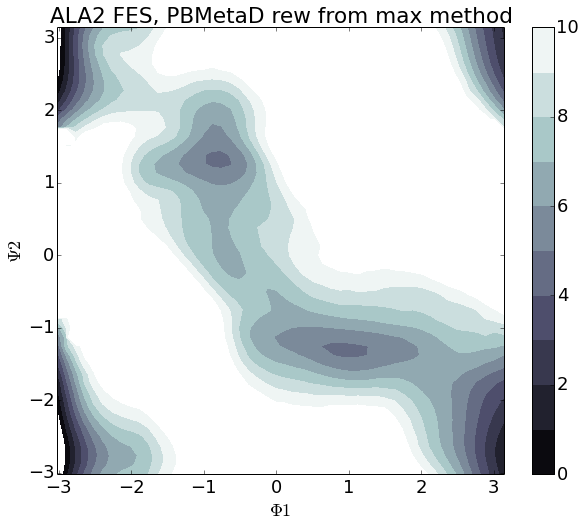

In [14]:
%matplotlib inline
ang1wt1=np.transpose(ang1wt1)
#what spacing do you want?  
spacer=1
lines=10 #this goes to kt 
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)

fig=plt.figure(figsize=(10,8)) 
axes = fig.add_subplot(111)

plt.contourf(xedges2[1::], yedges2[1::], -1.0*np.log(ang1wt2),levels, cmap=plt.cm.bone,)
plt.colorbar()
plt.xlabel('$\Phi 1$')
plt.ylabel('$\Psi 2$')
plt.title('ALA2 FES, PBMetaD rew from max method ')
#axes.set_ylim([.1,.5])

#axes.set_xlim([0.1,0.5])
plt.rcParams.update({'font.size': 18})
plt.show()

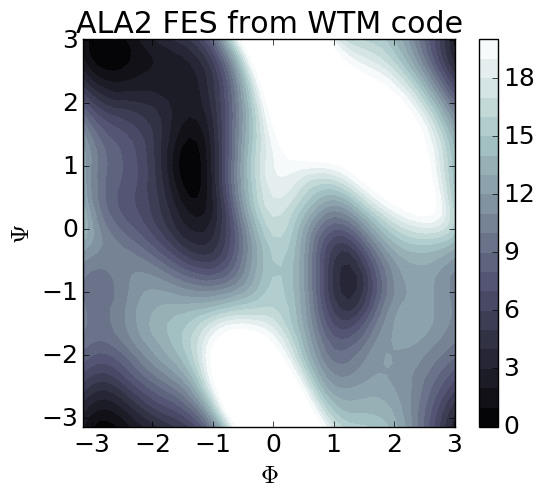

In [4]:
%matplotlib inline 

#2D FES from PT simulation 
#read the data in from a text file 
fesdata = np.genfromtxt('ALA2/WTM-2/fes.dat.100',comments='#');

dim1=50
dim2=50
fesdata = fesdata[:,0:3]
enertokcal=8.314e-3*300
#some post-processing to be compatible with contourf 
X=np.reshape(fesdata[:,0],[dim1,dim2],order="F")  #order F was 20% faster than A/C
Y=np.reshape(fesdata[:,1],[dim1,dim2],order="F") 
Z=np.reshape((fesdata[:,2]-np.min(fesdata[:,2])),[dim1,dim2],order="F")  #convert to kcal/mol

#what spacing do you want?  
spacer=1.0
lines=20 #this goes to 80 kcal/mol (2*40)
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)

fig=plt.figure(figsize=(6,5)) 
axes = fig.add_subplot(111)

plt.contourf(X, Y, Z/enertokcal, levels, cmap=plt.cm.bone,)
plt.colorbar()
plt.xlabel('$\Phi$')
plt.ylabel('$\Psi$')
plt.title('ALA2 FES from WTM code')
plt.rcParams.update({'font.size': 18})
plt.show()



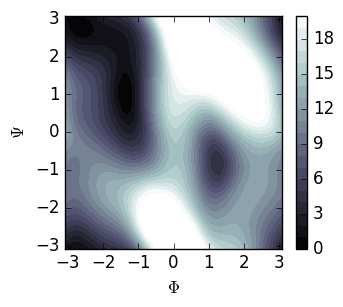

In [9]:
%matplotlib inline 

#2D FES from PT simulation 
#read the data in from a text file 
fesdata2 = np.genfromtxt('ALA2/whamfes.dat',comments='#');

dim1=50
dim2=50
fesdata2 = fesdata2[:,0:3]
enertokcal=8.314e-3*300
#some post-processing to be compatible with contourf 
#X2=np.reshape(fesdata2[:,0],[dim1,dim2],order="F")  #order F was 20% faster than A/C
#Y2=np.reshape(fesdata2[:,1],[dim1,dim2],order="F") 
#Z2=np.reshape((fesdata2[:,2]-np.min(fesdata2[:,2])),[dim1,dim2],order="F")  #convert to kcal/mol

#what spacing do you want?  
spacer=1.0
lines=20 #this goes to 80 kcal/mol (2*40)
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)

fig=plt.figure(figsize=(3.5,3)) 
axes = fig.add_subplot(111)

plt.contourf(X2, Y2, Z2/enertokcal, levels, cmap=plt.cm.bone,)
plt.colorbar()
plt.xlabel('$\Phi$')
plt.ylabel('$\Psi$')
#plt.title('ALA2 FES from WHAM2D code')
plt.rcParams.update({'font.size': 12})
plt.show()

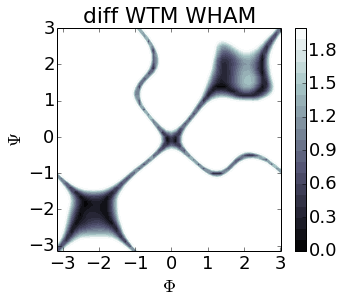

In [219]:
%matplotlib inline 

#2D FES from PT simulation 
#read the data in from a text file 
enertokcal=8.314e-3*300

#what spacing do you want?  
spacer=0.1
lines=20 #this goes to 80 kcal/mol (2*40)
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)

fig=plt.figure(figsize=(5,4)) 
axes = fig.add_subplot(111)

plt.contourf(X, Y, np.abs(Z-Z2)/enertokcal, levels, cmap=plt.cm.bone,)
plt.colorbar()
plt.xlabel('$\Phi$')
plt.ylabel('$\Psi$')
plt.title('diff WTM WHAM ')
plt.rcParams.update({'font.size': 18})
plt.show()

In [20]:
def klD(var,var2,kt):
    #where var = current , var2 = ref
    RMSD=np.sqrt(np.sum(np.multiply(np.power(((var-var.mean())-(var2-var2.mean()))/kt,2), \
                                       np.exp(-var2/kt)))/np.sum(np.exp(-var2/kt)))
    
    return RMSD

In [22]:
def RMSDcut(var,var2,kt,nu):
    #where var = current , var2 = ref
    top=0
    bot=0
    for i,j in np.nditer([var,var2]):
        if (j<nu):
            #top=top+np.sum( np.power(((var-var.mean())-(var2-var2.mean()))/kt,2) )
            top=top+np.sum( np.power(((i-var.mean())-(j-var2.mean()))/kt,2) )
            bot=bot+1 
            
    
    RMSD=np.sqrt(top/bot)
 
   
    return RMSD

In [236]:

gX, gY = np.mgrid[-1.0*np.pi:np.pi:50j, -1.0*np.pi:np.pi:50j]
gX, gY = np.mgrid[-3.0:3.0:50j, -3.0:3.0:50j ]

In [237]:
Znew=griddata(fesdata[:,:2],fesdata[:,2],(gX, gY),method='cubic',fill_value=1000)
Z2new=griddata(fesdata2[:,:2],fesdata2[:,2],(gX, gY),method='cubic',fill_value=1000)

In [244]:
np.sqrt(np.sum(np.power(Znew-Z2new,2)))
klD(Znew,Z2new,enertokcal)

0.67991290737712917

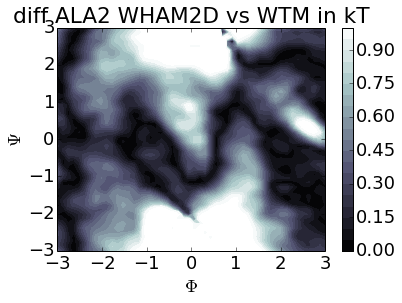

In [239]:
%matplotlib inline 

enertokcal=8.314e-3*300
#
#what spacing do you want?  
spacer=0.05
lines=20 #this goes to 80 kcal/mol (2*40)
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)

fig=plt.figure(figsize=(6,4)) 
axes = fig.add_subplot(111)

plt.contourf(gX,gY,np.abs(Z2new-Znew)/enertokcal, levels, cmap=plt.cm.bone,)
plt.colorbar()
plt.xlabel('$\Phi$')
plt.ylabel('$\Psi$')
plt.title('diff ALA2 WHAM2D vs WTM in kT')
plt.rcParams.update({'font.size': 18})
plt.show()

In [165]:
def RMSDcut(var,var2,kt,nu):
    #where var = current , var2 = ref
    top=0
    bot=0
    for i,j in np.nditer([var,var2]):
        if (j<nu):
            #top=top+np.sum( np.power(((var-var.mean())-(var2-var2.mean()))/kt,2) )
            top=top+np.sum( np.power(((i-var.mean())-(j-var2.mean()))/kt,2) )
            bot=bot+1 
            
    
    RMSD=np.sqrt(top/bot)/kt
 
   
    return RMSD

In [173]:
def klD(var,var2,kt):
    #where var = current , var2 = ref
    RMSD=np.sqrt(np.sum(np.multiply(np.power(((var-var.mean())-(var2-var2.mean()))/kt,2), \
                                       np.exp(-var2/kt)))/np.sum(np.exp(-var2/kt)))
    
    return RMSD/kt

In [221]:
print RMSDcut(Z,Z2,enertokcal,enertokcal*6)
print klD(Z,Z2,enertokcal)

3.69864107865
3.78420712403


In [233]:
print RMSDcut(Znew,Z2new,enertokcal,enertokcal*6)
print klD(Znew,Z2new,enertokcal)

38.0333067026
35.3569902999


In [201]:
fesdata = np.genfromtxt('ALA2/WTM-2/fes.dat.2',comments='#')
#fesdata = fesdata[:,0:3]
fesdata2 = np.genfromtxt('ALA2/whamfes.dat',comments='#')
gX, gY = np.mgrid[-1.0*np.pi:np.pi:50j, -1.0*np.pi:np.pi:50j]
Znew=griddata(fesdata[:,:2],fesdata[:,2],(gX, gY),method='cubic',fill_value=1000)
Z2new=griddata(fesdata2[:,:2],fesdata2[:,2],(gX, gY),method='cubic',fill_value=1000)
print RMSDcut(Z,Z2,enertokcal,enertokcal*6)
print klD(Z,Z2,enertokcal)

1.42584257037
1.52202159714


In [202]:
print X-X2

[[-0.06292265 -0.18858265 -0.31424265 ..., -5.96894265 -6.09460265
  -6.22026265]
 [ 0.06274105 -0.06291895 -0.18857895 ..., -5.84327895 -5.96893895
  -6.09459895]
 [ 0.18840476  0.06274476 -0.06291524 ..., -5.71761524 -5.84327524
  -5.96893524]
 ..., 
 [ 5.84327153  5.71761153  5.59195153 ..., -0.06274846 -0.18840846
  -0.31406846]
 [ 5.96893524  5.84327524  5.71761524 ...,  0.06291524 -0.06274476
  -0.18840476]
 [ 6.09459895  5.96893895  5.84327895 ...,  0.18857895  0.06291895
  -0.06274105]]
